# **WebGoogle-10txt**

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nama_file = '/content/drive/MyDrive/PPW/web-Google_10k.txt'

In [6]:
data_node = pd.read_csv(
    nama_file,
    sep='\t',          # data dipisahkan oleh tab
    comment='#',       # abaikan baris yang diawali tanda #
    names=['FromNodeId', 'ToNodeId'],  # nama kolom
    # header=0           # tidak ada header di baris pertama setelah komentar
)

In [7]:
display(data_node)

,FromNodeId,ToNodeId
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0
...,...,...
78318,495600,271199
78319,495600,407927
78320,495600,555924
78321,495600,628974


# **1. Membangun Graph Menggunakan NetworkX**

In [8]:
graph = nx.DiGraph()
edge = list(zip(data_node['FromNodeId'], data_node['ToNodeId']))
graph.add_edges_from(edge)

print(f"Jumlah node : {graph.number_of_nodes()}")
print(f"Jumlah edge : {graph.number_of_edges()}")

Jumlah node : 10000
Jumlah edge : 78323


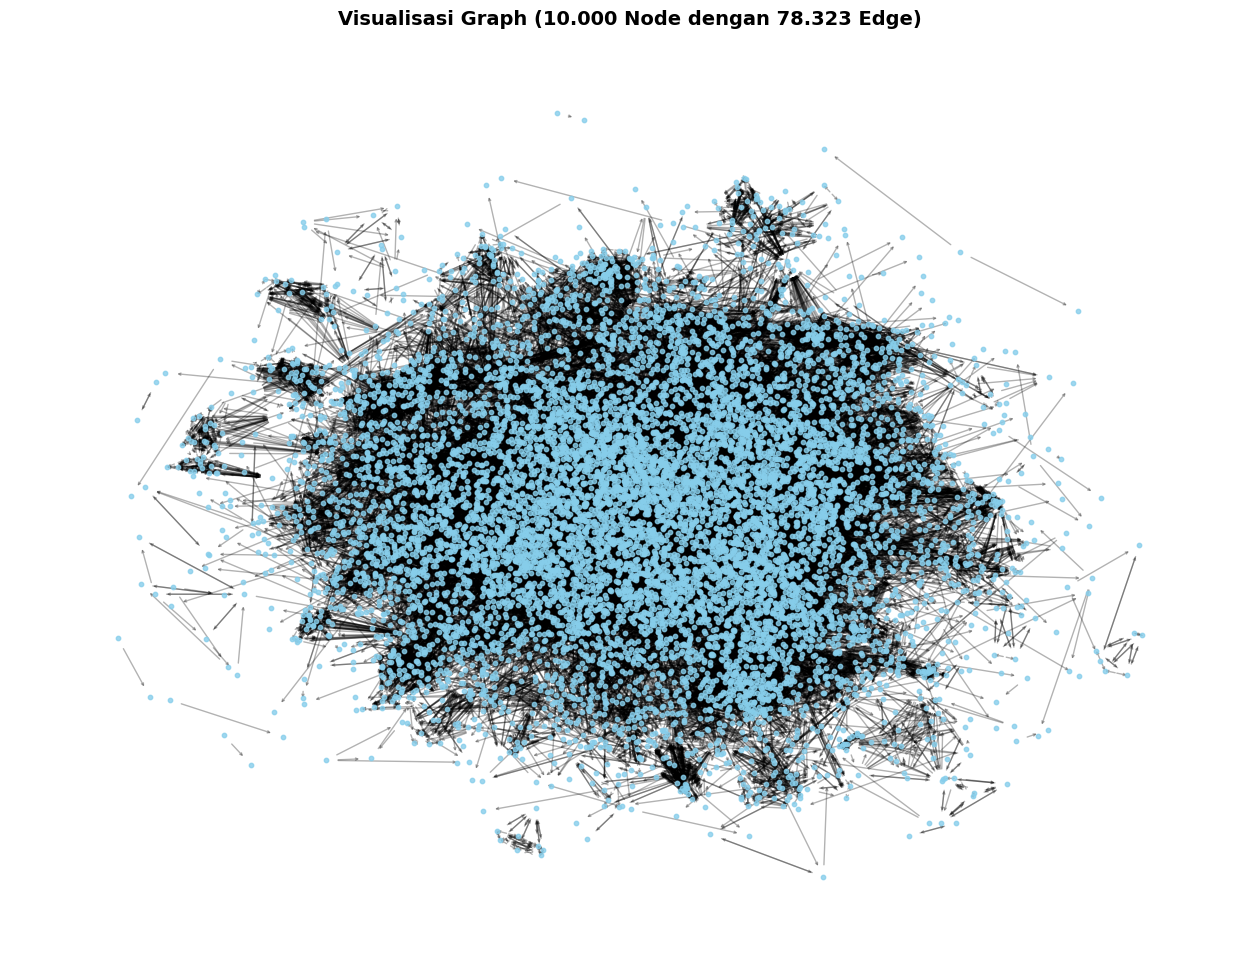

In [9]:
# Visualisasi Graph
plt.figure(figsize=(16, 12))
plt.title("Visualisasi Graph (10.000 Node dengan 78.323 Edge)", fontsize=14, fontweight='bold')

# layout efisien untuk dataset besar
pos = nx.spring_layout(graph, seed=42, k=0.15, iterations=20)

# gambar node dan edge
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=10, alpha=0.8)
# nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=False, alpha=0.3)
nx.draw_networkx_edges(graph, pos, edge_color='black', arrowstyle='->', arrowsize=4, alpha=0.3)

# label, bisa ditampilkan (resiko crash atau hang karena 10.000 node). aktifkan :
# nx.draw_networkx_labels(graph, pos, font_size=6, font_color='black')

plt.axis('off')
plt.show()

# **2. Membentuk Matriks Adjacency**

In [10]:
# note: all matriks berukuran 10.000 x 10.000, sangat besar untuk ditampilkan
# jadi ditampilkan sebagian (misalnya 30x30)
node = list(graph.nodes())[:30]
A = nx.to_numpy_array(graph, nodelist=node, dtype=int)

data_node_A = pd.DataFrame(A, index=node, columns=node)
print("Matriks Adjacency (A) [30x30]:")
display(data_node_A)

Matriks Adjacency (A) [30x30]:


,0,11342,824020,867923,891835,27469,38716,309564,322178,387543,...,535748,695578,136593,414038,523684,760842,815602,846213,857527,112028
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11342,1,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
824020,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
867923,1,1,0,0,1,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,0
891835,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
27469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38716,1,1,0,1,1,0,0,0,1,1,...,1,0,1,1,1,1,1,0,1,0
309564,0,1,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
322178,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387543,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **3. Membentuk Matriks Probabilitas Transisi Baris-Stokastik**

In [11]:
adj_full = nx.to_numpy_array(graph, dtype=float)
n = adj_full.shape[0]

# tangani dangling node (node tanpa outlink)
out_degree = adj_full.sum(axis=1)
for i in range(n):
    if out_degree[i] == 0:
        adj_full[i, :] = 1.0

# matriks transisi baris-stokastik
P = adj_full / adj_full.sum(axis=1, keepdims=True)

# tampilan sebagian matriks P
data_node_P = pd.DataFrame(P[:30, :30], columns=range(30), index=range(30))
print("Matriks Transisi (P) [30x30]:")
display(data_node_P)

Matriks Transisi (P) [30x30]:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.250000,0.2500,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1,0.071429,0.000000,0.0000,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,0.090909,0.000000,0.0000,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.090909,...,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
3,0.083333,0.083333,0.0000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0000
4,0.100000,0.100000,0.0000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.1000
5,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
6,0.058824,0.058824,0.0000,0.058824,0.058824,0.000000,0.000000,0.000000,0.058824,0.058824,...,0.058824,0.000000,0.058824,0.058824,0.058824,0.058824,0.058824,0.000000,0.058824,0.0000
7,0.000000,0.090909,0.0000,0.090909,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0000
8,0.250000,0.250000,0.0000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
9,0.142857,0.142857,0.0000,0.142857,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


# **4. Membentuk Matriks Kolom-Stokastik**

In [12]:
# M = Pᵀ (kolom-stokastik)
M = P.T
data_node_M = pd.DataFrame(M[:30, :30], columns=range(30), index=range(30))
print("Matriks M = Pᵀ [30x30]:")
display(data_node_M)

Matriks M = Pᵀ [30x30]:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.00,0.071429,0.090909,0.083333,0.1,0.0,0.058824,0.000000,0.25,0.142857,...,0.2,0.076923,0.083333,0.25,0.083333,0.166667,0.2,0.090909,0.111111,0.0001
1,0.25,0.000000,0.000000,0.083333,0.1,0.0,0.058824,0.090909,0.25,0.142857,...,0.2,0.000000,0.083333,0.25,0.083333,0.166667,0.2,0.090909,0.111111,0.0001
2,0.25,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0001
3,0.25,0.071429,0.090909,0.000000,0.1,0.0,0.058824,0.090909,0.25,0.142857,...,0.2,0.076923,0.083333,0.25,0.083333,0.166667,0.2,0.090909,0.111111,0.0001
4,0.25,0.071429,0.090909,0.083333,0.0,0.0,0.058824,0.090909,0.25,0.142857,...,0.2,0.076923,0.083333,0.25,0.083333,0.166667,0.2,0.090909,0.000000,0.0001
5,0.00,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.000000,...,0.0,0.000000,0.083333,0.00,0.000000,0.000000,0.0,0.000000,0.111111,0.0001
6,0.00,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.142857,...,0.0,0.076923,0.083333,0.00,0.083333,0.000000,0.0,0.090909,0.111111,0.0001
7,0.00,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0001
8,0.00,0.071429,0.090909,0.000000,0.0,0.0,0.058824,0.000000,0.00,0.000000,...,0.0,0.076923,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0001
9,0.00,0.071429,0.090909,0.000000,0.0,0.0,0.058824,0.000000,0.00,0.000000,...,0.0,0.076923,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0001


# **5. Menghitung PageRank Iteratif (Manual)**

In [13]:
def pagerank_iteratif(M, nodelist, d=0.85, max_iter=100, tol=1e-6):
    n = M.shape[0]
    r = np.ones(n) / n
    teleport = (1 - d) / n

    for i in range(max_iter):
        r_new = d * M @ r + teleport
        # debugging aja
        indeks_top_node = np.argmax(r_new)  # indeks node dengan PageRank tertinggi
        top_node = nodelist[indeks_top_node] # node dengan score pagerank tertinggi
        print(f"Iterasi {i+1}: Node {top_node} dengan PageRank {r_new[indeks_top_node]:.6f}")
        if np.linalg.norm(r_new - r, 1) < tol:
            # debugging aja
            print(f"Konvergen setelah {i+1} iterasi")
            break
        r = r_new
    return r

print("Menghitung PageRank (butuh waktu karena 10.000 node):")

urutan_node = list(graph.nodes())
r = pagerank_iteratif(M, nodelist=urutan_node, d=0.85, max_iter=100, tol=1e-6)

Menghitung PageRank (butuh waktu karena 10.000 node):
Iterasi 1: Node 151110 dengan PageRank 0.007679
Iterasi 2: Node 285814 dengan PageRank 0.003722
Iterasi 3: Node 486980 dengan PageRank 0.006135
Iterasi 4: Node 486980 dengan PageRank 0.004940
Iterasi 5: Node 486980 dengan PageRank 0.006267
Iterasi 6: Node 486980 dengan PageRank 0.005782
Iterasi 7: Node 486980 dengan PageRank 0.006423
Iterasi 8: Node 486980 dengan PageRank 0.006245
Iterasi 9: Node 486980 dengan PageRank 0.006567
Iterasi 10: Node 486980 dengan PageRank 0.006515
Iterasi 11: Node 486980 dengan PageRank 0.006684
Iterasi 12: Node 486980 dengan PageRank 0.006681
Iterasi 13: Node 486980 dengan PageRank 0.006773
Iterasi 14: Node 486980 dengan PageRank 0.006786
Iterasi 15: Node 486980 dengan PageRank 0.006839
Iterasi 16: Node 486980 dengan PageRank 0.006854
Iterasi 17: Node 486980 dengan PageRank 0.006886
Iterasi 18: Node 486980 dengan PageRank 0.006900
Iterasi 19: Node 486980 dengan PageRank 0.006920
Iterasi 20: Node 486980 

# **6. Menampilkan dan Menyimpan Hasil PageRank-semua page**

In [14]:
score_pagerank = pd.DataFrame({
    'node': list(graph.nodes()),
    'pagerank': r
})

# mengurutkan node dengan nilai PageRank tertinggi ke terendah
data_pagerank_node = score_pagerank.sort_values(by='pagerank', ascending=False).reset_index(drop=True)
print("Data Node dan Score PageRank:")
display(data_pagerank_node)

Data Node dan Score PageRank:


,node,pagerank
0,486980,0.006999
1,285814,0.004748
2,226374,0.003396
3,163075,0.003331
4,555924,0.002686
...,...,...
9995,195,0.000021
9996,113,0.000021
9997,311,0.000021
9998,9,0.000021


In [16]:
data_pagerank_node.to_csv("/content/drive/MyDrive/PPW/PPW_Tugas6_WebGoogle10K_PageRank(Manual).csv", index=False)

# **6. Menampilkan dan Menyimpan Hasil PageRank - 5 page**

In [17]:
lima_node_penting = data_pagerank_node.head(5)
print("5 Node dengan Nilai PageRank Tertinggi:")
display(lima_node_penting)

5 Node dengan Nilai PageRank Tertinggi:


,node,pagerank
0,486980,0.006999
1,285814,0.004748
2,226374,0.003396
3,163075,0.003331
4,555924,0.002686


# **7. Perbandingan: Menghitung dan Menampilkan PageRank Menggunakan NetworkX - semua node**

In [18]:
score_pagerank_networkx = nx.pagerank(graph, alpha=0.85)
data_pagerank_node_networkx = pd.DataFrame(list(score_pagerank_networkx.items()), columns=['node', 'pagerank'])

# node score pagerank tertinggi ke terendah
data_node_pagerank_networkx_urut = data_pagerank_node_networkx.sort_values(by='pagerank', ascending=False).reset_index(drop=True)
print("Perbandingan Menggunakan NetworkX - Data Node dan Score PageRank:")
display(data_node_pagerank_networkx_urut)

Perbandingan Menggunakan NetworkX - Data Node dan Score PageRank:


,node,pagerank
0,486980,0.006515
1,285814,0.004633
2,226374,0.003301
3,163075,0.003288
4,555924,0.002756
...,...,...
9995,43,0.000021
9996,67,0.000021
9997,198,0.000021
9998,195,0.000021


In [19]:
# OPSIONAL
# kalau mau simpan hasil data node dan score pagerank pembanding menggunakan NetworkX, aktifkan :
# data_node_pagerank_networkx_urut.to_csv("PPW_Tugas6_WebGoogle10K_PageRank(NetworkX).csv", index=False)

# **7. Perbandingan: Menghitung dan Menampilkan PageRank Menggunakan NetworkX - 5 node**

In [20]:
lima_node_penting_networkx = data_node_pagerank_networkx_urut.head(5)

print("Perbandingan Menggunakan NetworkX - 5 Node dengan Nilai PageRank Tertinggi:")
display(lima_node_penting_networkx)

Perbandingan Menggunakan NetworkX - 5 Node dengan Nilai PageRank Tertinggi:


,node,pagerank
0,486980,0.006515
1,285814,0.004633
2,226374,0.003301
3,163075,0.003288
4,555924,0.002756


# **8. Visualisasi Hubungan Node Penting dengan Node Terhubung**

In [21]:
# simpan node dengan PageRank tertinggi ke variabel
node_penting = int(lima_node_penting.iloc[0]['node'])
print(f"Node dengan nilai PageRank tertinggi: {node_penting}")

# node yang terhubung dengan node penting (incoming dan outgoing)
neighbors_out = list(graph.successors(node_penting))   # node yang ditaut oleh node_penting
neighbors_in = list(graph.predecessors(node_penting))  # node yang menaut ke node_penting

# menggabungkan semua node yang relevan
node_terhubung = set(neighbors_out + neighbors_in + [node_penting])

# buat subgraph dari node-node tersebut
subgraph_node_terhubung = graph.subgraph(node_terhubung)

Node dengan nilai PageRank tertinggi: 486980


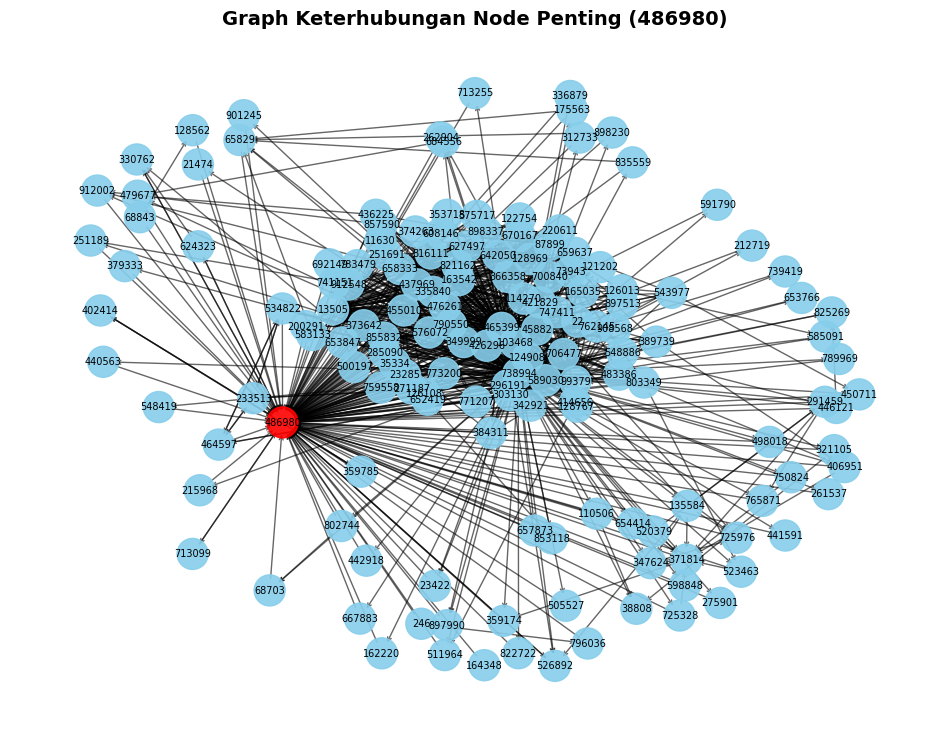

In [22]:
# Visualisasi Graph
plt.figure(figsize=(12, 9))
plt.title(f"Graph Keterhubungan Node Penting ({node_penting})", fontsize=14, fontweight='bold')

pos = nx.spring_layout(subgraph_node_terhubung, seed=42, k=0.3)

# warna berbeda untuk node penting
warna_node = ['red' if node == node_penting else 'skyblue' for node in subgraph_node_terhubung.nodes()]

nx.draw_networkx_nodes(subgraph_node_terhubung, pos, node_color=warna_node, node_size=500, alpha=0.9)
nx.draw_networkx_edges(subgraph_node_terhubung, pos, edge_color='black', arrowstyle='->', arrowsize=7, alpha=0.6)
nx.draw_networkx_labels(subgraph_node_terhubung, pos, font_size=7, font_color='black')

plt.axis('off')
plt.show()

In [23]:
# Data Keterhubungan Node Penting
print(f"Jumlah total node yang terhubung dengan {node_penting}: {len(node_terhubung)}")

# DataFrame untuk incoming dan outgoing edges
df_in = pd.DataFrame({
    'FromNodeId': neighbors_in,
    'ToNodeId': [node_penting] * len(neighbors_in)
})
df_out = pd.DataFrame({
    'FromNodeId': [node_penting] * len(neighbors_out),
    'ToNodeId': neighbors_out
})

# gabungkan kedua arah hubungan
data_node_terhubung = pd.concat([df_in, df_out], ignore_index=True)

print(f"Daftar Node yang Terhubung dengan Node {node_penting} (Incoming dan Outgoing):")
display(data_node_terhubung)

Jumlah total node yang terhubung dengan 486980: 156
Daftar Node yang Terhubung dengan Node 486980 (Incoming dan Outgoing):


,FromNodeId,ToNodeId
0,22,486980
1,13505,486980
2,87899,486980
3,99379,486980
4,124908,486980
...,...,...
156,486980,359785
157,486980,402414
158,486980,526892
159,486980,624323
